## 13.1.1 라이브러리 및 데이터 불러오기


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)

In [ ]:
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [ ]:
customer_X = customer.drop('label', axis = 1)
customer_y = customer['label']

## 13.1.2 그래프 표현을 위한 차원축소


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(customer_X)
customer_pca = pca.transform(customer_X)

In [ ]:
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [ ]:
customer_pca = pd.DataFrame(customer_pca, columns = ['PC1','PC2'])

In [ ]:
customer_pca = customer_pca.join(customer_y)

In [ ]:
customer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


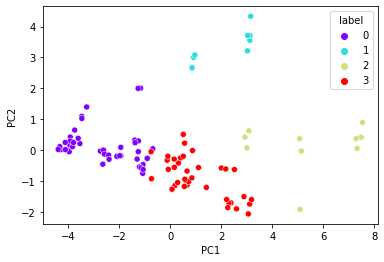

In [ ]:
sns.scatterplot(x='PC1',y='PC2', data = customer_pca, hue = 'label', palette='rainbow')

In [ ]:
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=customer_X.columns)

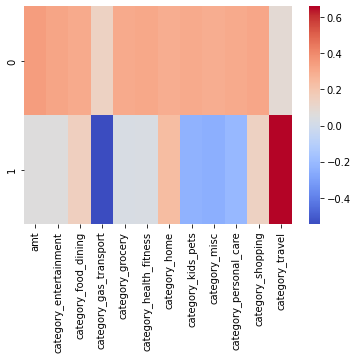

In [ ]:
sns.heatmap(df_comp,cmap='coolwarm')

## 13.2.2 다차원 데이터 불러오기

In [ ]:
file_url = 'https://media.githubusercontent.com/media/snkn1959/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [ ]:
anonymous.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V4257,V4258,V4259,V4260,V4261,V4262,V4263,V4264,V4265,V4266,V4267,V4268,V4269,V4270,V4271,V4272,V4273,V4274,V4275,V4276,V4277,V4278,V4279,V4280,V4281,V4282,V4283,V4284,V4285,V4286,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,0.0,0.0,0.015318,0.23429,0.0,0.0,1.613,0.20087,0.10177,0.0,0.0,2.5626,0.29882,0.0,0.0,0.0,0.0,0.0,0.0,1.1981,1.2609,0.015383,0.0,0.0,1.1477,0.0,0.076152,0.0,0.0,2.3558,...,0.280730,0.322110,0.297510,0.225480,0.026999,0.376380,-0.141110,-0.005053,-0.431420,-0.09418,0.293000,-0.15099,0.011485,0.156660,0.009033,-0.344180,-0.077186,0.198920,0.120570,0.109800,-0.012763,0.102410,-0.14023,-0.20009,-0.03614,0.105510,0.007147,0.126820,0.013869,0.129640,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,0.0,0.0,0.015318,0.23429,0.0,0.0,1.613,0.20087,0.10177,0.0,0.0,2.5626,0.29882,0.0,0.0,0.0,0.0,0.0,0.0,1.1981,1.2609,0.015383,0.0,0.0,1.1477,0.0,0.076152,0.0,0.0,2.3558,...,0.222800,-0.036075,-0.176920,-0.211040,0.037790,0.257120,-0.070155,-0.132540,-0.191290,0.25913,0.185930,-0.33534,0.390990,0.650390,0.086637,0.032566,0.053952,-0.089354,0.201120,0.025955,0.360580,-0.162780,-0.18191,-0.81403,-0.00359,0.066584,0.114930,0.329720,0.192070,0.141810,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,0.0,0.0,0.015318,0.23429,0.0,0.0,1.613,0.20087,0.10177,0.0,0.0,2.5626,0.29882,0.0,0.0,0.0,0.0,0.0,0.0,1.1981,1.2609,0.015383,0.0,0.0,1.1477,0.0,0.076152,0.0,0.0,2.3558,...,0.476930,0.055434,0.228290,-0.260430,0.295430,0.520710,0.307780,-0.155630,0.064620,-0.18273,-0.080364,-0.35518,0.449460,-0.019624,0.127760,-0.229840,-0.042158,0.114210,0.367710,-0.440670,-0.023654,-0.657880,-0.17058,-0.23632,0.56024,-0.065215,0.004288,0.480380,0.105090,0.553870,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,0.0,0.0,0.015318,0.23429,0.0,0.0,1.613,0.20087,0.10177,0.0,0.0,2.5626,0.29882,0.0,0.0,0.0,0.0,0.0,0.0,1.1981,1.2609,0.015383,0.0,0.0,1.1477,0.0,0.076152,0.0,0.0,2.3558,...,0.150630,0.011584,-0.045964,0.095665,0.063873,0.495910,-0.099321,-0.430640,-0.377730,-0.21851,0.121530,-0.56355,-0.226340,0.380970,-0.046026,0.117120,-0.132060,-0.063306,0.030819,-0.281150,0.103570,0.024453,-0.22613,0.10835,0.24609,0.019168,-0.076724,0.040909,-0.205810,0.016379,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,0.0,0.0,0.015318,0.23429,0.0,0.0,1.613,0.20087,0.10177,0.0,0.0,2.5626,0.29882,0.0,0.0,0.0,0.0,0.0,0.0,1.1981,1.2609,0.015383,0.0,0.0,1.1477,0.0,0.076152,0.0,0.0,2.3558,...,-0.001096,0.370090,-0.164960,0.114980,0.086594,0.094723,0.193230,-0.115090,-0.030869,0.34938,0.534270,-0.39323,-0.361660,0.116630,0.117610,0.240540,0.209360,-0.262850,0.225370,-0.237260,-0.316560,-0.228020,-0.68407,-0.14300,0.30096,0.109360,-0.064033,0.268570,0.337350,0.288380,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [ ]:
anonymous['class'].mean()

0.25

In [ ]:
anonymous.isna().sum().sum()

0

## 13.2.3 PCA에 따른 모델링 성능/결과 비교하기


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'], test_size=0.2, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100) 

In [ ]:
import time
start_time = time.time()
model_1.fit(X_train, y_train)
print(time.time() - start_time)

125.0409996509552


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.755

In [ ]:
proba_1 = model_1.predict_proba(X_test_scaled)
roc_auc_score(y_test, proba_1[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8441136991070199

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.04992445, 0.03331409])

In [ ]:
var_ratio = []

In [ ]:
for i in range(100,550, 50):
    pca = PCA(n_components=i)
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum() # ❶ 
    var_ratio.append(ratio)      

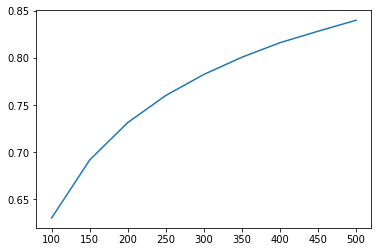

In [ ]:
sns.lineplot(x=range(100,550,50), y=var_ratio)

In [ ]:
pca = PCA(n_components=400)
pca.fit(X_train_scaled) # ❶ 
X_train_scaled_pca = pca.transform(X_train_scaled) # ❷ 
X_test_scaled_pca = pca.transform(X_test_scaled)   # ❸ 

In [ ]:
model_2 = RandomForestClassifier(random_state=100) 
start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)
print(time.time() - start_time) 

67.78307747840881


In [ ]:
pred_2 = model_2.predict(X_test_scaled_pca)
accuracy_score(y_test, pred_2)

0.99

In [ ]:
proba_2 = model_2.predict_proba(X_test_scaled_pca)
roc_auc_score(y_test, proba_2[:,1])

0.9982789692274063